In [1]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn.optimizer import GradientOptimizer, GridSearchOptimizer
from easyesn import PredictionESN
from easyesn import helper as hlp
import matplotlib.pyplot as plt


Using Numpy backend.


In [3]:
inputLength = 1000
data = np.sin(np.linspace(0, 4*np.pi, inputLength)).reshape(-1,1)
targetData = np.roll(data, -1)

inputData = data[:int(inputLength*0.7)]
validationData = data[int(inputLength*0.3):]

inputTarget = targetData[:int(inputLength*0.7)]
validationTarget = targetData[int(inputLength*0.3):]

In [4]:
esn = PredictionESN(n_input=1, n_output=1, n_reservoir=50, regression_parameters=[1e-2], solver="lsqr")

In [5]:
esn.fit(inputData, inputTarget)

0.0021212884183835698

In [6]:
opt = GradientOptimizer(esn)

In [7]:
validationLosses, fitLosses, spectralRadiuses, leakingRates, inputScalings = opt.optimizeParameterForTrainError(inputData, inputTarget, validationData, validationTarget, learningRate=0.03,transientTime = 100, epochs=20)

TypeError: optimizeParameterForTrainError() got an unexpected keyword argument 'learningRate'

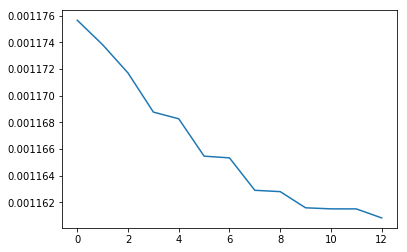

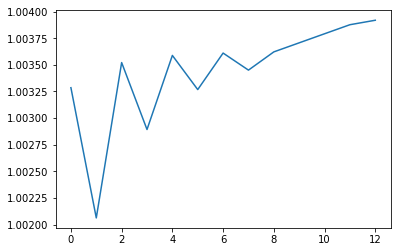

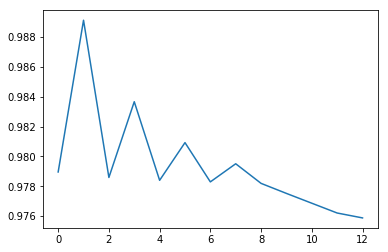

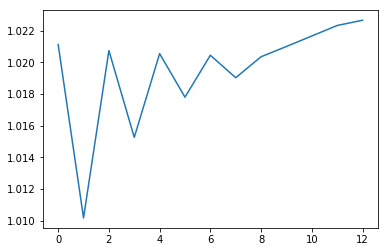

In [13]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()

In [ ]:
param_grid = {"leakingRate": np.linspace(0.01,1.2, 10), "spectralRadius":np.linspace(0.01,1.2,10)}
fixed_params = {"n_reservoir":50, "n_input":1, "n_output":1}
gopt = GridSearchOptimizer(param_grid, fixed_params, PredictionESN)
results = gopt.fit(inputData, inputTarget, [(validationData, validationTarget)])

In [5]:
gopt = GridSearchOptimizer(None, None, None)

100% (399 of 399) |#######################| Elapsed Time: 0:00:42 ETA:  0:00:00

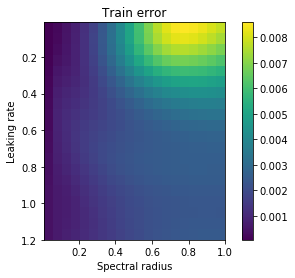

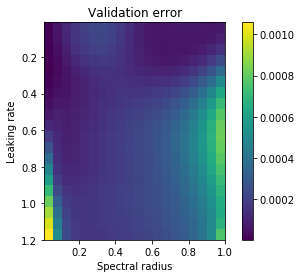

In [6]:
g1, g2 = gopt.plotErrorSurface(esn, 20, 100, inputData, inputTarget, validationData, validationTarget, {"Leaking rate": (0.01, 1.2), "Spectral radius": (0.01, 1)})